In [41]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
from gtts import gTTS

In [ ]:
def capture_image_from_camera(file_path):
    # Start the camera
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        return

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Display the resulting frame
        cv2.imshow("Press Space to capture", frame)

        # Press 'Space' to save the image and exit
        if cv2.waitKey(1) == ord(" "):
            cv2.imwrite(file_path, frame)  # Save the frame as an image file
            print(f"Image saved to {file_path}")
            break

    # When everything done, release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()


# Path where the image will be saved
image_path = "your_image_path_here.jpg"
capture_image_from_camera(image_path)

In [21]:
# if you don't want to take input from camera and use a locally stored image use this
# image_path = "testimg.jpeg"

In [22]:
img = cv2.imread(image_path)

In [30]:
reader = easyocr.Reader(["en"], gpu=True)

In [24]:
text_ = reader.readtext(img)

In [33]:
all_text = []

In [38]:
threshold = 0.25
# draw bbox and text
for t_, t in enumerate(text_):
    bbox, text, score = t

    if score > threshold:
        # Draw a rectangle around the detected text and label it
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

        # Add the text to the list
        all_text.append(text)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


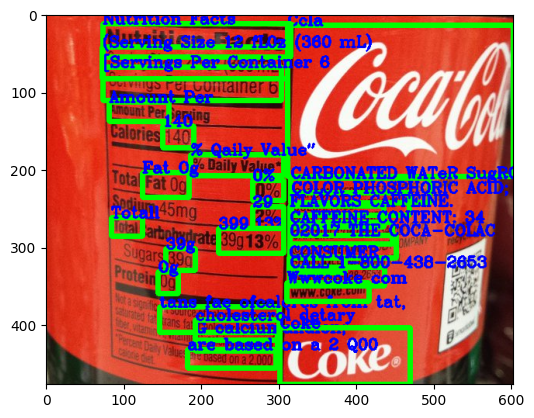

In [39]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [40]:
# Concatenate all detected text
concatenated_text = " ".join(all_text)

In [42]:
# Generate and save the speech audio file
if concatenated_text:
    tts = gTTS(text=concatenated_text, lang="en")
    tts.save("output_audio.mp3")
    print("Audio file saved as 'output_audio.mp3'")
else:
    print("No valid text detected to convert to speech.")

Audio file saved as 'output_audio.mp3'
